# Data-X Spring 2018: Homework 02

### Regression, Classification, Webscraping

**Authors:** Sana Iqbal (Part 1, 2, 3), Alexander Fred-Ojala (Extra Credit)


In this homework, you will do some exercises with prediction-classification, regression and web-scraping.


## Part 1


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1:Read the data file in python. Describe data features in terms of type, distribution range and mean values. Plot feature distributions.This step should give you clues about data sufficiency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

energy = pd.read_csv("Energy.csv")

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1  
count  768.000000  768.00000  768.000000  
mean     0.234375    2.81250   22.307201  
std      0.133221    1.55096   10.090196  
min      0.000000    0.00000    6.010000  
25%      0.100000    1.75000   12.992500  
50%      0.250000    

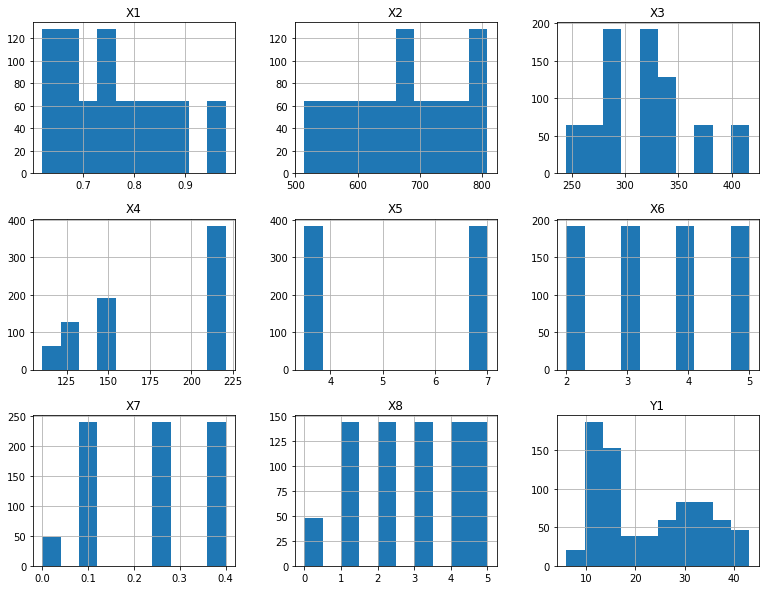

In [2]:
print(energy.describe())
print(energy.info())
energy.hist(figsize=(13,10))
plt.show()

 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q2.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.__



In [3]:
energy['Intercept']=np.ones(len(energy['X1']))
np.random.seed(150)
from sklearn.model_selection import train_test_split
energy_train, energy_test = train_test_split(energy, test_size=0.15)


In [4]:
X=energy_train[['Intercept','X1','X2','X3','X4','X5','X6','X7','X8']].values
Y=energy_train['Y1'].values
W=np.linalg.lstsq(X,Y)[0]

print("beta values are",W)


beta values are [  8.00752349e+01  -6.25080383e+01  -6.01702663e-02   3.58280238e-02
  -4.79991451e-02   4.19905578e+00   1.63071494e-02   1.98895967e+01
   2.51115474e-01]



#### Q.2.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 15 percent of unseen data (test error) __ 



In [5]:
Yp=W.dot(X.T)
err_train=Yp-Y
errsq_train=(np.sum(err_train**2)/len(Y))**0.5
print("training error RMS = ",errsq_train)

tX=energy_test[['Intercept','X1','X2','X3','X4','X5','X6','X7','X8']].values
test_Y=energy_test['Y1'].values
test_pred=W.dot(tX.T)
err_test=test_pred-test_Y
errsq_test=(np.sum(err_test**2)/len(test_Y))**0.5
print("test error RMS =", errsq_test)


training error RMS =  2.9162380734
test error RMS = 2.94412590449



__ Q2.3: Lets us see the effect of amount of data on the performance of prediction model.Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data   is the same as above for  all  these cases.__  

Plot error rates vs number of training examples.Comment on the relationshipyou observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

In [6]:
def linreg(train,test,num):
    X=train[0:num][['Intercept','X1','X2','X3','X4','X5','X6','X7','X8']].values
    Y=train[0:num]['Y1'].values
    W=np.linalg.lstsq(X,Y)[0]
    Y_tra=W.dot(X.T)
    err_tr=Y_tra-Y
    errsq_tr=(np.sum(err_tr**2)/len(Y))**0.5
    
    Xt=test[['Intercept','X1','X2','X3','X4','X5','X6','X7','X8']].values
    Yt=test['Y1'].values
    pred=W.dot(Xt.T)
    err_st=pred-Yt
    errsq_st=(np.sum(err_st**2)/len(Yt))**0.5
    print("\n \n for "+str(num)+" training data:")
    print("Training error RMS =",errsq_tr)
    print("Test set error RMS =",errsq_st)
    return [errsq_tr,errsq_st]



 
 for 100 training data:
Training error RMS = 2.67452829068
Test set error RMS = 3.1426980615

 
 for 200 training data:
Training error RMS = 2.89778558317
Test set error RMS = 3.03269271744

 
 for 300 training data:
Training error RMS = 2.88250654749
Test set error RMS = 2.95447794187

 
 for 400 training data:
Training error RMS = 2.83187904917
Test set error RMS = 2.92417651385

 
 for 500 training data:
Training error RMS = 2.89746393391
Test set error RMS = 2.93120881037

 
 for 652 training data:
Training error RMS = 2.9162380734
Test set error RMS = 2.94412590449


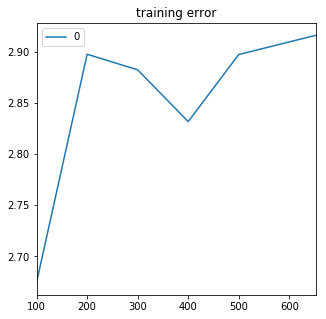

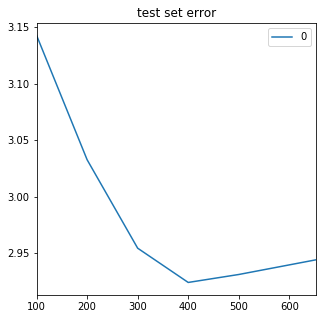

In [7]:
test_err=[]
train_err=[]
amount=[100,200,300,400,500,len(energy_train)]
for num in amount:
    a=linreg(energy_train,energy_test,num)
    train_err.append(a[0])
    test_err.append(a[1])
df1=pd.DataFrame(train_err,amount)
df2=pd.DataFrame(test_err,amount)
df1.plot(figsize=(5,5),title="training error")
df2.plot(figsize=(5,5),title="test set error")
plt.show()




__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 3.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 15),   
1: 'Medium'  (15-30),   
2: 'High'  (>30)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.15.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [8]:
energy.loc[energy['Y1']<15,'HL']=0
energy.loc[(energy['Y1']>=15) & (energy['Y1']<=30),'HL']=1
energy.loc[energy['Y1']>30,'HL']=2

np.random.seed(150)
from sklearn.model_selection import train_test_split
energy_train, energy_test = train_test_split(energy, test_size=0.15)

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

X=energy_train.drop(['Y1','HL','Intercept'],axis=1)
Y=energy_train['HL']
logreg.fit(X,Y)
lr_tr_pred=logreg.predict(X)
lr_tr_acc=sum(lr_tr_pred == Y)/len(Y)*100
print("Training set accuracy = ", lr_tr_acc,"%")

X_st=energy_test.drop(['Y1','HL','Intercept'],axis=1)
Y_st=energy_test['HL']
lr_pred=logreg.predict(X_st)
lr_acc = sum(lr_pred == Y_st)/len(Y_st)*100
print("Test set accuracy = ", lr_acc,"%")

Training set accuracy =  80.0613496933 %
Test set accuracy =  75.8620689655 %


__ Q3.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization.If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
X_st=min_max_scaler.fit_transform(X_st)

logreg.fit(X,Y)
lr_tr_pred1=logreg.predict(X)
lr_tr_acc1=sum(lr_tr_pred1 == Y)/len(Y)*100
print("Training set accuracy = ", lr_tr_acc1,"%")

lr_pred1=logreg.predict(X_st)
lr_acc1 = sum(lr_pred1 == Y_st)/len(Y_st)*100
print("Test set accuracy = ", lr_acc1,"%")

print("\nTraining set accuracy improves by", lr_tr_acc1-lr_tr_acc,"%")
print("Test set accuracy improves by", lr_acc1-lr_acc,"%")

Training set accuracy =  80.8282208589 %
Test set accuracy =  76.724137931 %

Training set accuracy improves by 0.766871165644 %
Test set accuracy improves by 0.862068965517 %


## Part 2



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. Analyze the data features, check for NaN values. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 

__ 2. Preprocess data to replace NaN values in a feature(if any) using mean of the feature.  
Train  logistic regression, SVM, perceptron, kNN, xgboost and random forest models using this preprocessed data with 20% test split.Report training and test accuracies.__







In [110]:
diabete = pd.read_csv("diabetesdata.csv")
print(diabete.describe())
print(diabete.info())

       TimesPregnant  glucoseLevel          BP     insulin         BMI  \
count     768.000000    734.000000  768.000000  768.000000  768.000000   
mean        3.845052    121.016349   69.105469   79.799479   31.992578   
std         3.369578     31.660240   19.355807  115.244002    7.884160   
min         0.000000      0.000000    0.000000    0.000000    0.000000   
25%         1.000000     99.000000   62.000000    0.000000   27.300000   
50%         3.000000    117.000000   72.000000   30.500000   32.000000   
75%         6.000000    141.000000   80.000000  127.250000   36.600000   
max        17.000000    199.000000  122.000000  846.000000   67.100000   

         Pedigree         Age  IsDiabetic  
count  768.000000  735.000000  768.000000  
mean     0.471876   33.353741    0.348958  
std      0.331329   11.772944    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.00

In [111]:
diabete.loc[diabete['glucoseLevel'].isnull(),'glucoseLevel']=diabete['glucoseLevel'].mean()
diabete.loc[diabete['Age'].isnull(),'Age']=int(diabete['Age'].mean())
diabete['Age']= diabete['Age'].astype(int)
print(diabete.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
TimesPregnant    768 non-null int64
glucoseLevel     768 non-null float64
BP               768 non-null int64
insulin          768 non-null int64
BMI              768 non-null float64
Pedigree         768 non-null float64
Age              768 non-null int32
IsDiabetic       768 non-null int64
dtypes: float64(3), int32(1), int64(4)
memory usage: 45.1 KB
None




__3. What is the  ratio of diabetic persons in 3 equirange bands of 'BMI' and 'Pedigree' in the provided dataset.__

 __Convert these features - 'BP','insulin','BMI' and 'Pedigree'   into categorical values by mapping different bands of values of these features to integers 0,1,2.__  
 
HINT: USE pd.cut with bin=3 to create 3 bins






In [112]:
diabete['BPBand'] = pd.cut(diabete['BP'], bins=3,labels=[0,1,2])
diabete['insulinBand'] = pd.cut(diabete['insulin'], bins=3,labels=[0,1,2])
diabete['BMIBand'] = pd.cut(diabete['BMI'], bins=3,labels=[0,1,2])
diabete['PedigreeBand'] = pd.cut(diabete['Pedigree'], bins=3,labels=[0,1,2])
for i in range(3):
    perc=100*len(diabete[(diabete['BMIBand']==i)&(diabete['IsDiabetic']==1)])/len(diabete[diabete['BMIBand']==i])
    print(perc,"% of people in BMI Band "+str(i)+" have diabetes")
print()
for i in range(3):
    perc=100*len(diabete[(diabete['PedigreeBand']==i)&(diabete['IsDiabetic']==1)])/len(diabete[diabete['PedigreeBand']==i])
    print(perc,"% of people in Pedigree Band "+str(i)+" have diabetes")

3.9215686274509802 % of people in BMI Band 0 have diabetes
35.82966226138032 % of people in BMI Band 1 have diabetes
61.111111111111114 % of people in BMI Band 2 have diabetes

32.7007299270073 % of people in Pedigree Band 0 have diabetes
54.054054054054056 % of people in Pedigree Band 1 have diabetes
44.44444444444444 % of people in Pedigree Band 2 have diabetes



__4. Now consider the original dataset again, instead of generalizing the NAN values with the mean of the feature we will try assigning values to NANs based on some hypothesis. For example for age we assume that the relation between BMI and BP of people is a reflection of the age group.We can have 9 types of BMI and BP relations and our aim is to find the median age of each of that group:__

Your Age guess matrix will look like this:  

| BMI | 0       | 1      | 2  |
|-----|-------------|------------- |----- |
| BP  |             |              |      |
| 0   | a00         | a01          | a02  |
| 1   | a10         | a11          | a12  |
| 2   | a20         | a21          |  a22 |


__Create a guess_matrix  for NaN values of *'Age'* ( using 'BMI' and 'BP')  and  *'glucoseLevel'*  (using 'BP' and 'Pedigree') for the given dataset and assign values accordingly to the NaNs in 'Age' or *'glucoseLevel'* .__


Refer to how we guessed age in the titanic notebook in the class.



In [117]:
diabete = pd.read_csv("diabetesdata.csv")
diabete['BPBand'] = pd.cut(diabete['BP'], bins=3,labels=[0,1,2])
diabete['insulinBand'] = pd.cut(diabete['insulin'], bins=3,labels=[0,1,2])
diabete['BMIBand'] = pd.cut(diabete['BMI'], bins=3,labels=[0,1,2])
diabete['PedigreeBand'] = pd.cut(diabete['Pedigree'], bins=3,labels=[0,1,2])
for i in range(3):
    perc=100*len(diabete[(diabete['BMIBand']==i)&(diabete['IsDiabetic']==1)])/len(diabete[diabete['BMIBand']==i])
    print(perc,"% of people in BMI Band "+str(i)+" have diabetes")
print()
for i in range(3):
    perc=100*len(diabete[(diabete['PedigreeBand']==i)&(diabete['IsDiabetic']==1)])/len(diabete[diabete['PedigreeBand']==i])
    print(perc,"% of people in Pedigree Band "+str(i)+" have diabetes")


3.9215686274509802 % of people in BMI Band 0 have diabetes
35.82966226138032 % of people in BMI Band 1 have diabetes
61.111111111111114 % of people in BMI Band 2 have diabetes

32.7007299270073 % of people in Pedigree Band 0 have diabetes
54.054054054054056 % of people in Pedigree Band 1 have diabetes
44.44444444444444 % of people in Pedigree Band 2 have diabetes


In [118]:
guess_age = np.zeros((3,3),dtype=int)
guess_glu = np.zeros((3,3),dtype=int)
for i in range(3):
    for j in range(3):
        guess_df = diabete[(diabete['BMIBand'] == i)&(diabete['BPBand'] == j)]['Age'].dropna()
        age_g=guess_df.median()
        guess_age[i,j]=int(age_g)
        
        guess_df2 = diabete[(diabete['PedigreeBand'] == i)&(diabete['BPBand'] == j)]['glucoseLevel'].dropna()
        glu_g=guess_df2.median()
        guess_glu[i,j]=int(glu_g)
for i in range(3):
    for j in range(3):
            diabete.loc[ (diabete['Age'].isnull()) & (diabete['BMIBand'] == i) \
                    & (diabete['BPBand'] == j),'Age'] = guess_age[i,j]
            diabete.loc[ (diabete['glucoseLevel'].isnull()) & (diabete['PedigreeBand'] == i) \
                    & (diabete['BPBand'] == j),'glucoseLevel'] = guess_glu[i,j]
diabete['Age']= diabete['Age'].astype(int)
print(diabete.head())
diabete.info()



   TimesPregnant  glucoseLevel  BP  insulin   BMI  Pedigree  Age  IsDiabetic  \
0              6         148.0  72        0  33.6     0.627   50           1   
1              1         112.0  66        0  26.6     0.351   31           0   
2              8         183.0  64        0  23.3     0.672   29           1   
3              1         112.0  66       94  28.1     0.167   21           0   
4              0         137.0  40      168  43.1     2.288   33           1   

  BPBand insulinBand BMIBand PedigreeBand  
0      1           0       1            0  
1      1           0       1            0  
2      1           0       1            0  
3      1           0       1            0  
4      0           0       1            2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
TimesPregnant    768 non-null int64
glucoseLevel     768 non-null float64
BP               768 non-null int64
insulin          768 non-null int64
BMI 



__5. Now, convert 'glucoseLevel' and 'Age' features also to categorical variables of 5 categories each.__

__Use this dataset (with all features in categorical form) to train perceptron, logistic regression and random forest models using 20% test split. Report training and test accuracies.__







In [119]:
diabete['AgeBand'] = pd.cut(diabete['Age'], bins=5,labels=[0,1,2,3,4])
diabete['glucoseLevelBand'] = pd.cut(diabete['glucoseLevel'], bins=5,labels=[0,1,2,3,4])
diabete.head()

,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic,BPBand,insulinBand,BMIBand,PedigreeBand,AgeBand,glucoseLevelBand
0,6,148.0,72,0,33.6,0.627,50,1,1,0,1,0,2,3
1,1,112.0,66,0,26.6,0.351,31,0,1,0,1,0,0,2
2,8,183.0,64,0,23.3,0.672,29,1,1,0,1,0,0,4
3,1,112.0,66,94,28.1,0.167,21,0,1,0,1,0,0,2
4,0,137.0,40,168,43.1,2.288,33,1,0,0,1,2,0,3


In [121]:
X=diabete[['BPBand','insulinBand','BMIBand','PedigreeBand','AgeBand','glucoseLevelBand']]
Y=diabete['IsDiabetic']

np.random.seed(1337)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
lr_tr_pred=logreg.predict(X_train)
lr_tr_acc=sum(lr_tr_pred == Y_train)/len(Y_train)*100
print("Logistic Regression Training set accuracy = ", lr_tr_acc,"%")

lr_st_pred=logreg.predict(X_val)
lr_st_acc=sum(lr_st_pred == Y_val)/len(Y_val)*100
print("Logistic Regression Test set accuracy = ", lr_st_acc,"%")

Logistic Regression Training set accuracy =  75.4071661238 %
Logistic Regression Test set accuracy =  78.5714285714 %


In [126]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

per_tr_pred=perceptron.predict(X_train)
per_tr_acc=sum(per_tr_pred == Y_train)/len(Y_train)*100
print("Perception Training set accuracy = ", per_tr_acc,"%")

per_st_pred=perceptron.predict(X_val)
per_st_acc=sum(per_st_pred == Y_val)/len(Y_val)*100
print("Perception Test set accuracy = ", per_st_acc,"%")

Perception Training set accuracy =  62.7035830619 %
Perception Test set accuracy =  74.6753246753 %


C:\Users\jylia\Anaconda3\envs\data-x\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, Y_train)

rf_tr_pred=rf.predict(X_train)
rf_tr_acc=sum(rf_tr_pred == Y_train)/len(Y_train)*100
print("Random Forest Training set accuracy = ", rf_tr_acc,"%")

rf_st_pred=perceptron.predict(X_val)
rf_st_acc=sum(rf_st_pred == Y_val)/len(Y_val)*100
print("Random Forest Test set accuracy = ", rf_st_acc,"%")

Random Forest Training set accuracy =  78.990228013 %
Random Forest Test set accuracy =  74.6753246753 %


### Part 3

1. __Derive the expression for the optimal parameters in the linear regression equation, i.e. solve the normal equation for Ordinary Least Squares for the case of Simple Linear Regression, when we only have one input and one output__

Given a set of _n_ points $(X_i,Y_i)$ where $Yi$ is dependent on $Xi$ by a linear relation,  find the best-fit line,$$Z_i = {aX_i + b}$$  that minimizes the __sum of squared errors in Y__,i.e: $$minimize \sum_{i}{(Y_i- Z_i)^2}$$
__i. __ Show that $$ intercept \quad b = \overline{Y}-  a.\overline{X}\quad  and   \quad slope \quad a= \frac{\sum_{i}(X_i- \overline{X})(Y_i- \overline{Y})}{ \sum_{i}(X_i- \overline{X})^2}$$


 where $\overline{X}$ and  $\overline{Y}$ are the averages of the X values and the Y values, respectively.
 
__ ii. __Show that slope _a_ can be written as $ a = r.(S_y /S_x)$ where $S_y$  = the standard deviation of the Y values and $S_x$= the standard deviation of the X values and _r_ is the correlation coefficient.

##### Please try to write a nice LateXed version of your answer, and do the derivations of the expressions as nicely as possible


_____

i)
line predictor L = Y = E[Y] + Y-E[Y] = E[Y]+(Y-E[Y])(X-E[X])/(X-E[X])
                                     = E[Y]+cov(X,Y)/var(x) *(X-E[X])     .....cov(X,Y)=(Y-E[Y])(X-E[X]);var(X)=(X-E[X])^2
                                     = (cov(X,Y)/var(X))*X + (E[Y]-(cov(X,Y)/var(X))*E[X])
                                     = aX + b 
                                     ...... a =cov(X,Y)/var(X); b =E[Y]-a*E[X]
ii)
r=corr(X,Y)=cov(X,Y)/(Std(X)*Std(Y)); var(X)=Std(X)^2
a= cov(X,Y)/var(X) = corr(X,Y)*(Std(X)*Std(Y)) / Std(X)^2 =corr(X,Y)*std(Y)/std(X) = r*(Std(Y)/Std(X)


# Two Extra Credit Points: Fun with Webscraping & Text manipulation
### (Mandatory for Grad students!)

<div class='alert alert-info'> `NOTE:` **If you are a Graduate Section student (enrolled in 290), the Extra Credit Questions are mandatory.**</div>

## 1. Statistics in Presidential Debates

Your first task is to scrape Presidential Debates from the Commission of Presidential Debates website: http://www.debates.org/index.php?page=debate-transcripts.

To do this, you are not allowed to manually look up the URLs that you need, instead you have to scrape them. The root url to be scraped is the one listed above, namely: http://www.debates.org/index.php?page=debate-transcripts


1. By using `requests` and `BeautifulSoup` find all the links / URLs on the website that links to transcriptions of **First Presidential Debates** from the years [2012, 2008, 2004, 2000, 1996, 1988, 1984, 1976, 1960]. In total you should find 9 links / URLs tat fulfill this criteria.
2. When you have a list of the URLs your task is to create a Data Frame with some statistics (see example of output below):
    1. Scrape the title of each link and use that as the column name in your Data Frame. 
    2. Count how long the transcript of the debate is (as in the number of characters in transcription string). Feel free to include `\` characters in your count, but remove any breakline characters, i.e. `\n`. You will get credit if your count is +/- 10% from our result.
    3. Count how many times the word **war** was used in the different debates. Note that you have to convert the text in a smart way (to not count the word **warranty** for example, but counting **war.**, **war!**, **war,** or **War** etc.
    4. Also scrape the most common used word in the debate, and write how many times it was used. Note that you have to use the same strategy as in 3 in order to do this.
    
**Tips:**

___

In order to solve question 3 and 4 above it can be useful to work with Regular Expressions and explore methods on strings like `.strip(), .replace(), .find(), .count(), .lower()` etc. Both are very powerful tools to do string processing in Python. To count common words for example I used a `Counter` object and a Regular expression pattern for only words, see example:

```python
    from collections import Counter
    import re

    counts = Counter(re.findall(r"[\w']+", text.lower()))
```

Read more about Regular Expressions here: https://docs.python.org/3/howto/regex.html
    
    
**Example output of all of the answers to EC Question 1:**


![pres_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/president_stats.png)




----

.




In [1]:
import requests
import bs4 as bs
from collections import Counter
import re
import pandas as pd
import numpy as np

source = requests.get("http://www.debates.org/index.php?page=debate-transcripts",) 
print(source)
soup = bs.BeautifulSoup(source.content, features='html.parser')


<Response [200]>


In [210]:
####### 1.
tab=[]
li=[]
links = soup.find_all('a')

for l in links:
    if ('First' in l.text) & ('Presidential' in l.text) & ('Debate' in l.text):
        print("Info about {}: ".format(l.text), \
              l.get('href')) 
        tab.append(l.text)
        li.append(l.get('href'))
df= pd.DataFrame(columns=tab) ####a
for i in range(len(li)):
    length=[]
    war=[]
    ll=0
    df.loc['link',tab[i]]=li[i]
    co=requests.get(li[i],)
    cont=bs.BeautifulSoup(co.content, features='html.parser')
    x=cont.find_all('p')
    b=x[0]
    ##########b
    co = Counter(re.findall('[0-9A-Za-z?.,! ]', cc.text))
    for j in range(len(co.most_common())):
        ll += co.most_common()[j][1]
    df.loc['character',tab[i]]=ll
    for a in x:##########c
        war_len=a.text.count('War,')+a.text.count('war,')+a.text.count('wars')+a.text.count('War.')+a.text.count('war.')\
          +a.text.count('War!')+a.text.count('war!')+a.text.count('War ')+a.text.count('war ')
        war.append(war_len)
    df.loc['war_count',tab[i]]=np.sum(war.pop(0))
    ##################d
    counts = Counter(re.findall(r"[\w']+", b.text.lower()))
    df.loc['most_common_w',tab[i]]=counts.most_common()[0][0]
    df.loc['most_common_count',tab[i]]=counts.most_common()[0][1]
    
    
    
    
    


Info about October 3, 2012: The First Obama-Romney Presidential Debate:  http://www.debates.org/index.php?page=october-3-2012-debate-transcript
Info about September 26, 2008: The First McCain-Obama Presidential Debate:  http://www.debates.org/index.php?page=2008-debate-transcript
Info about September 30, 2004: The First Bush-Kerry Presidential Debate:  http://www.debates.org/index.php?page=september-30-2004-debate-transcript
Info about October 3, 2000: The First Gore-Bush Presidential Debate:  http://www.debates.org/index.php?page=october-3-2000-transcript
Info about October 6, 1996: The First Clinton-Dole Presidential Debate:  http://www.debates.org/index.php?page=october-6-1996-debate-transcript
Info about September 25, 1988: The First Bush-Dukakis Presidential Debate:  http://www.debates.org/index.php?page=september-25-1988-debate-transcript
Info about October 7, 1984: The First Reagan-Mondale Presidential Debate:  http://www.debates.org/index.php?page=october-7-1984-debate-transcri

In [211]:
df

,"October 3, 2012: The First Obama-Romney Presidential Debate","September 26, 2008: The First McCain-Obama Presidential Debate","September 30, 2004: The First Bush-Kerry Presidential Debate","October 3, 2000: The First Gore-Bush Presidential Debate","October 6, 1996: The First Clinton-Dole Presidential Debate","September 25, 1988: The First Bush-Dukakis Presidential Debate","October 7, 1984: The First Reagan-Mondale Presidential Debate","September 23, 1976: The First Carter-Ford Presidential Debate","September 26, 1960: The First Kennedy-Nixon Presidential Debate"
link,http://www.debates.org/index.php?page=october-...,http://www.debates.org/index.php?page=2008-deb...,http://www.debates.org/index.php?page=septembe...,http://www.debates.org/index.php?page=october-...,http://www.debates.org/index.php?page=october-...,http://www.debates.org/index.php?page=septembe...,http://www.debates.org/index.php?page=october-...,http://www.debates.org/index.php?page=septembe...,http://www.debates.org/index.php?page=septembe...
character,92912,92912,92912,92912,92912,92912,92912,92912,92912
war_count,5,48,63,11,15,7,3,7,3
most_common_w,the,the,the,the,the,the,the,the,the
most_common_count,757,1470,857,919,876,804,867,857,779


    
## 2. Download and read in specific line from many data sets

Scrape the first 27 data sets from this URL http://people.sc.fsu.edu/~jburkardt/datasets/regression/ (i.e.`x01.txt` - `x27.txt`). Then, save the 5th line in each data set, this should be the name of the data set author (get rid of the `#` symbol, the white spaces and the comma at the end). 

Count how many times (with a Python function) each author is the reference for one of the 27 data sets. Showcase your results, sorted, with the most common author name first and how many times he appeared in data sets. Use a Pandas DataFrame to show your results, see example.

**Example output of the answer EC Question 2:**

![author_stats](https://github.com/ikhlaqsidhu/data-x/raw/master/x-archive/misc/hw2_imgs_spring2018/data_authors.png)


In [52]:
import shutil
import os
source = requests.get("http://people.sc.fsu.edu/~jburkardt/datasets/regression/",) 
print(source)
soup = bs.BeautifulSoup(source.content, features='html.parser')

<Response [200]>


In [173]:
authors=[]
for n, link in enumerate(soup.find_all('a')):
    if '28' in link.text:
        break
    if 'txt' in link.text:
        file_url = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/'+link.get('href')
        file_name =  link.get('href')
        file_source = requests.get(file_url, stream = True)
        file_soup = bs.BeautifulSoup(file_source.content,features='lxml')
        x=file_soup.find_all('p')
        for d in x:
            tex=d.text.split('\n')
        art=tex[4].strip('#').strip(' ').strip(',')
        authors.append(art)
        print('author for '+file_name+' is '+art)
        del file_source


author for x01.txt is Helmut Spaeth
author for x02.txt is Helmut Spaeth
author for x03.txt is Helmut Spaeth
author for x04.txt is Helmut Spaeth
author for x05.txt is Helmut Spaeth
author for x06.txt is R J Freund and P D Minton
author for x07.txt is D G Kleinbaum and L L Kupper
author for x08.txt is Helmut Spaeth
author for x09.txt is D G Kleinbaum and L L Kupper
author for x10.txt is K A Brownlee
author for x11.txt is Helmut Spaeth
author for x12.txt is Helmut Spaeth
author for x13.txt is S Chatterjee and B Price
author for x14.txt is Helmut Spaeth
author for x15.txt is Helmut Spaeth
author for x16.txt is Helmut Spaeth
author for x17.txt is Helmut Spaeth
author for x18.txt is Helmut Spaeth
author for x19.txt is R J Freund and P D Minton
author for x20.txt is Helmut Spaeth
author for x21.txt is Helmut Spaeth
author for x22.txt is Helmut Spaeth
author for x23.txt is S Chatterjee, B Price
author for x24.txt is S Chatterjee, B Price
author for x25.txt is S Chatterjee, B Price
author for x

In [177]:
dfd=pd.DataFrame(columns=['Counts'])
dfd['Counts']=authors
Author_counts=pd.DataFrame(dfd.Counts.value_counts())
Author_counts

,Counts
Helmut Spaeth,16
"S Chatterjee, B Price",3
R J Freund and P D Minton,2
D G Kleinbaum and L L Kupper,2
"S C Narula, J F Wellington",2
K A Brownlee,1
S Chatterjee and B Price,1
